### Прежде чем заняться решением какой-то задачи связанной с текстами, эти тексты нужно обработать.

### NLTK (Natural Language Toolkit) это удобная библиотека для работы с текстом.

ссылка на источник

https://github.com/DLSchool/deep_learning_2018-19/tree/master/15.%20Text%20Mining

In [1]:
#!pip3 install --upgrade nltk 

In [2]:
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')

In [3]:
# Сейчас должно открыться окно загрузки данных nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

**Токенизация текста**

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize
 
data = "All work and no play makes jack a dull boy, all work and no play"
print(word_tokenize(data))

['All', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', ',', 'all', 'work', 'and', 'no', 'play']


In [5]:
print(sent_tokenize("I was going home when she rung. It was a surprise."))

['I was going home when she rung.', 'It was a surprise.']


In [6]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()

In [7]:
tokenizer.tokenize(data)

['All',
 'work',
 'and',
 'no',
 'play',
 'makes',
 'jack',
 'a',
 'dull',
 'boy',
 ',',
 'all',
 'work',
 'and',
 'no',
 'play']

**Удаление стоп слов, которые часто встречаются, но не несут особого смысла. Они могут мешать.**

In [8]:
from nltk.corpus import stopwords

In [9]:
stopWords = set(stopwords.words('english'))

In [10]:
len(stopWords)

179

In [11]:
res = [word for word in word_tokenize(data) if word not in stopWords]

In [12]:
# Пропал токен 'no'
res

['All', 'work', 'play', 'makes', 'jack', 'dull', 'boy', ',', 'work', 'play']

**Так же для каждого слова мы можем делать stemming, выделять его корень.**

In [13]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
words = ["game","gaming","gamed","games", "compacted"]

In [14]:
ps = PorterStemmer()
for word in words:
    print(ps.stem(word))

game
game
game
game
compact


**Part of speech tagging. NLTK умеет расставлять части речи словам в предложении.**

In [15]:
#nltk.download('averaged_perceptron_tagger')

In [16]:
import nltk
from nltk.tokenize import PunktSentenceTokenizer
sentences = nltk.sent_tokenize(data)   
for sent in sentences:
    print(nltk.pos_tag(nltk.word_tokenize(sent)))

[('All', 'DT'), ('work', 'NN'), ('and', 'CC'), ('no', 'DT'), ('play', 'NN'), ('makes', 'VBZ'), ('jack', 'RP'), ('a', 'DT'), ('dull', 'JJ'), ('boy', 'NN'), (',', ','), ('all', 'DT'), ('work', 'NN'), ('and', 'CC'), ('no', 'DT'), ('play', 'NN')]


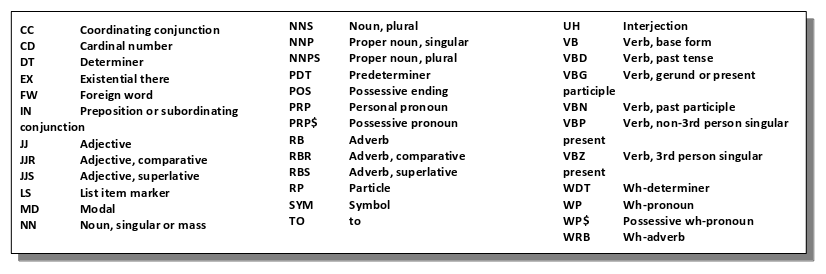

**Парсинг**

In [17]:
from nltk.corpus import treebank
nltk.download('treebank')

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\vanes\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [18]:
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t.draw()
# Сейчас должна открыться картинка.

**Лемматизация**

In [19]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)

In [20]:
nltk.download('wordnet')
wnl = nltk.WordNetLemmatizer()
[wnl.lemmatize(t) for t in tokens]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vanes\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['DENNIS',
 ':',
 'Listen',
 ',',
 'strange',
 'woman',
 'lying',
 'in',
 'pond',
 'distributing',
 'sword',
 'is',
 'no',
 'basis',
 'for',
 'a',
 'system',
 'of',
 'government',
 '.',
 'Supreme',
 'executive',
 'power',
 'derives',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony',
 '.']

### Часто возникает необходимость найти в тексте кусок удовлетворяющий определенному паттерну, или например заменить один паттерн на другой. В таких ситуациях на помощь приходят регулярные выражения.

**Рассмотрим несколько распространенных примеров использования регулярок.**

**Выделение определенных кусков слова**

In [21]:
import re

In [22]:
word = 'supercalifragilisticexpialidocious'
re.findall(r'[aeiou]|super', word)

['super', 'a', 'i', 'a', 'i', 'i', 'i', 'e', 'i', 'a', 'i', 'o', 'i', 'o', 'u']

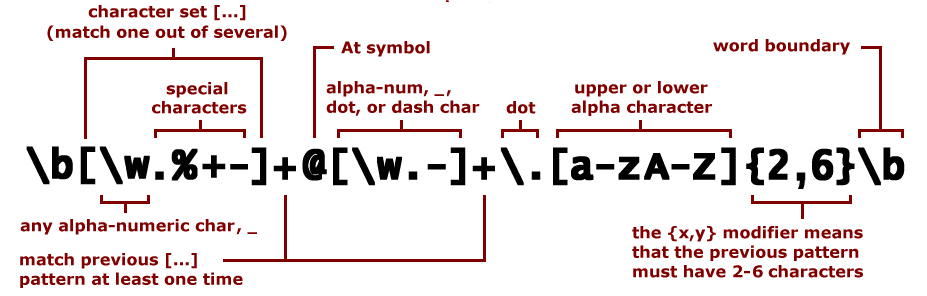

**Можно например посмотреть частоту встречи подобных паттернов**

In [23]:
wsj = sorted(set(nltk.corpus.treebank.words()))
fd = nltk.FreqDist(vs for word in wsj
                       for vs in re.findall(r'[aeiou]{2,}', word))
fd.most_common(12)

[('io', 549),
 ('ea', 476),
 ('ie', 331),
 ('ou', 329),
 ('ai', 261),
 ('ia', 253),
 ('ee', 217),
 ('oo', 174),
 ('ua', 109),
 ('au', 106),
 ('ue', 105),
 ('ui', 95)]

In [24]:
wsj[:20]

['!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'30s",
 "'40s",
 "'50s",
 "'80s",
 "'82",
 "'86",
 "'S",
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve"]

**Стэмминг с re**

In [25]:
def stem(word):
    regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
    stem, suffix = re.findall(regexp, word)[0]
    return stem

raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)
[stem(t) for t in tokens]

['DENNIS',
 ':',
 'Listen',
 ',',
 'strange',
 'women',
 'ly',
 'in',
 'pond',
 'distribut',
 'sword',
 'i',
 'no',
 'basi',
 'for',
 'a',
 'system',
 'of',
 'govern',
 '.',
 'Supreme',
 'execut',
 'power',
 'deriv',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony',
 '.']

**Токенизация с re**

In [26]:
raw = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone
though), 'I won't have any pepper in my kitchen AT ALL. Soup does very
well without--Maybe it's always pepper that makes people hot-tempered,'..."""

In [27]:
re.split(r'[ \t\n]+', raw)

["'When",
 "I'M",
 'a',
 "Duchess,'",
 'she',
 'said',
 'to',
 'herself,',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though),',
 "'I",
 "won't",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL.',
 'Soup',
 'does',
 'very',
 'well',
 'without--Maybe',
 "it's",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 "hot-tempered,'..."]

### 20 newsgroups это датасет с 18000 новостей, сгруппированных по 20 темам.

In [28]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

In [29]:
list(newsgroups_train.target_names)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [30]:
newsgroups_train.filenames.shape

(11314,)

In [31]:
newsgroups_train.target.shape

(11314,)

In [32]:
cats = ['alt.atheism', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats)

In [33]:
newsgroups_train.filenames.shape

(1073,)

In [34]:
newsgroups_train.filenames[:3]

array(['C:\\Users\\vanes\\scikit_learn_data\\20news_home\\20news-bydate-train\\alt.atheism\\51312',
       'C:\\Users\\vanes\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\60929',
       'C:\\Users\\vanes\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\61239'],
      dtype='<U95')

In [35]:
newsgroups_train.target[:10]

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

### Давайте векторизуем эти тексты с помощью TF-IDF

 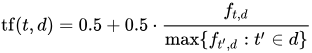

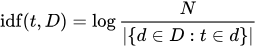

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
categories = ['alt.atheism', 'talk.religion.misc',
              'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      categories=categories)

#### Некоторые параметры TfidfVectorizer: 
#### input : string {‘filename’, ‘file’, ‘content’}
#### lowercase : boolean, default True
#### preprocessor : callable or None (default)
#### tokenizer : callable or None (default)
#### stop_words : string {‘english’}, list, or None (default)'
#### ngram_range : tuple (min_n, max_n)
#### max_df : float in range [0.0, 1.0] or int, default=1.0
#### min_df : float in range [0.0, 1.0] or int, default=1
#### max_features : int or None, default=None

In [37]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 34118)

In [38]:
vectorizer = TfidfVectorizer(lowercase=False)
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 42307)

In [39]:
vectorizer = TfidfVectorizer(min_df=0.2)
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 90)

In [40]:
vectorizer = TfidfVectorizer(max_df=0.9)
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 34111)

In [41]:
import nltk

In [42]:
# Эта штука работает дольше
vectorizer = TfidfVectorizer(tokenizer=nltk.word_tokenize)
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 40925)

In [43]:
vector = vectors.todense()[1]

In [44]:
vector[vector != 0]

matrix([[0.03659262, 0.065845  , 0.10838243, 0.09478803, 0.12289295,
         0.0775108 , 0.02121691, 0.08096784, 0.04657752, 0.1052778 ,
         0.0488404 , 0.08686214, 0.1052778 , 0.1052778 , 0.1052778 ,
         0.07851165, 0.19213994, 0.07970455, 0.02100512, 0.0899945 ,
         0.01779566, 0.03987186, 0.04496453, 0.05084716, 0.05045257,
         0.02576993, 0.2996747 , 0.04706732, 0.08281283, 0.02149255,
         0.02316815, 0.07765431, 0.07765431, 0.1052778 , 0.0198007 ,
         0.033389  , 0.05863011, 0.06930382, 0.06803771, 0.0614956 ,
         0.07070344, 0.06616361, 0.07469005, 0.05661072, 0.09989157,
         0.07765431, 0.08263177, 0.06930382, 0.16526355, 0.09989157,
         0.0852975 , 0.1052778 , 0.07684897, 0.05088816, 0.1184773 ,
         0.06803771, 0.09068374, 0.1052778 , 0.06483409, 0.03548154,
         0.27205121, 0.01328409, 0.1052778 , 0.04390452, 0.07342394,
         0.09989157, 0.04068952, 0.03393376, 0.04542832, 0.03725019,
         0.1052778 , 0.09989157, 0

In [45]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
wnl = nltk.WordNetLemmatizer()

In [46]:
def preproc1(text):
    return ' '.join([wnl.lemmatize(word) for word in text.lower().split() if word not in stopWords])

In [47]:
# Протестируем
st = "Oh, I think I ve landed Where there are miracles at work,  For the thirst and for the hunger Come the conference of birds"

In [49]:
preproc1(st)

'oh, think landed miracle work, thirst hunger come conference bird'

In [50]:
%%time
vectorizer = TfidfVectorizer(preprocessor=preproc1)
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

Wall time: 2.57 s


(2034, 33333)

In [51]:
vectors.shape

(2034, 33333)

### Можем посмотреть на косинусную меру между векторами

#### В этих векторах очень много нулей, поэтому по умолчанию они записываются как sparce matrix для экономии памяти

In [52]:
import numpy as np
from numpy.linalg import norm

In [53]:
type(vectors)

scipy.sparse.csr.csr_matrix

In [54]:
newsgroups_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1], dtype=int64)

In [55]:
np.unique(newsgroups_train.target)

array([0, 1, 2, 3], dtype=int64)

In [56]:
dense_vectors = vectors.todense()

In [57]:
dense_vectors.shape

(2034, 33333)

In [58]:
def cosine_sim(v1, v2):
    # v1, v2 (1 x dim)
    return np.array(v1 @ v2.T / norm(v1) / norm(v2))[0][0]

In [59]:
cosine_sim(dense_vectors[1], dense_vectors[1])

1.0000000000000002

In [60]:
cosines = []
for i in range(10):
    cosines.append(cosine_sim(dense_vectors[0], dense_vectors[i]))

In [61]:
# [1, 3, 2, 0, 2, 0, 2, 1, 2, 1]
cosines

[1.0,
 0.0034455323562894574,
 0.0008384205734050369,
 0.009520633091407658,
 0.016389116615460955,
 0.005472502183379232,
 0.006391801921667655,
 0.02793843302440465,
 0.006133448939959235,
 0.005308224034409543]

**Cамым близким оказался вектор из той же категории**

**Так же можно попробовать сделать классификацию на основе этих векторов**

In [62]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import SGDClassifier

**Сделаем таргеты one-hot**

In [63]:
eye = np.eye(4)

In [64]:
eye

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [65]:
oh_target = eye[newsgroups_train.target]

In [66]:
oh_target.shape

(2034, 4)

In [67]:
oh_target[:3]

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [68]:
svc = svm.SVC()

In [69]:
X_train, X_test, y_train, y_test= train_test_split(dense_vectors, newsgroups_train.target, test_size=0.2)

In [70]:
X_train.shape, y_test.shape

((1627, 33333), (407,))

In [71]:
%%time
svc.fit(X_train, y_train)

Wall time: 3min 17s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [72]:
from sklearn.metrics.classification import accuracy_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [73]:
accuracy_score(y_test, svc.predict(X_test))

0.9631449631449631

In [74]:
sgd = SGDClassifier()

In [75]:
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [76]:
accuracy_score(y_test, sgd.predict(X_test))

0.9705159705159705

### Итак, сегодня мы научились предобрабатывать данные и использовать TF-IDF